# Is halving the number of digits a good estimate of a number's square root?

## Introduction

In [What makes Mathematics hard to learn?](http://web.media.mit.edu/~minsky/OLPC-1.html) Minksy says:

> "You can estimate a square root simply by halving the number of digits!''. 

I wanted to explore that a bit further and use it to experiment with Jupyter and Python for data analysis.


## Imports

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline



## Step 1

To find the number of digits use $ \log_{10} x $




In [3]:
math.log10(100)

2.0

In [4]:
int(math.log10(999))

2

## Step 2

To halve the number of digits, multiply by $ 10^ {\frac{1} {2} n} $


In [5]:
1000000 * math.pow(10, - 6 / 2)

1000.0

## Estimation

The square root estimation function can be written thus:

In [6]:
def estimate(x) :
    n = math.log10(x) + 1
    return int(x * 10**-(n // 2))

In [15]:
estimate(10000)

100

In [8]:
estimate(9999)

99

In [9]:
estimate(100000)

100

## Testing a sample

Take a random sample of integers from 1 to 100000000, calculate their squares then calculate the square root estimates of those squares.

In [10]:
ns = random.sample(range(1,100000000), 1000)
nsquareds = [n**2 for n in ns]
estimates = [estimate(nsquared) for nsquared in nsquareds]


 Compare the original sample with the estimates:

In [11]:
data = pd.DataFrame({ 'n' : pd.Series(ns), 'estimate' : pd.Series(estimates), 'nsquared' : pd.Series(nsquareds)})

data.sort_values(by='n')

,estimate,n,nsquared
775,461493,214824,46149350976
435,830782,288233,83078262289
1,129636,360051,129636722601
818,456259,675470,456259720900
831,555789,745513,555789633169
372,897326,947273,897326136529
164,902747,950130,902747016900
528,941639,970381,941639285161
517,1011776,1005871,1011776468641
454,1036857,1018262,1036857500644


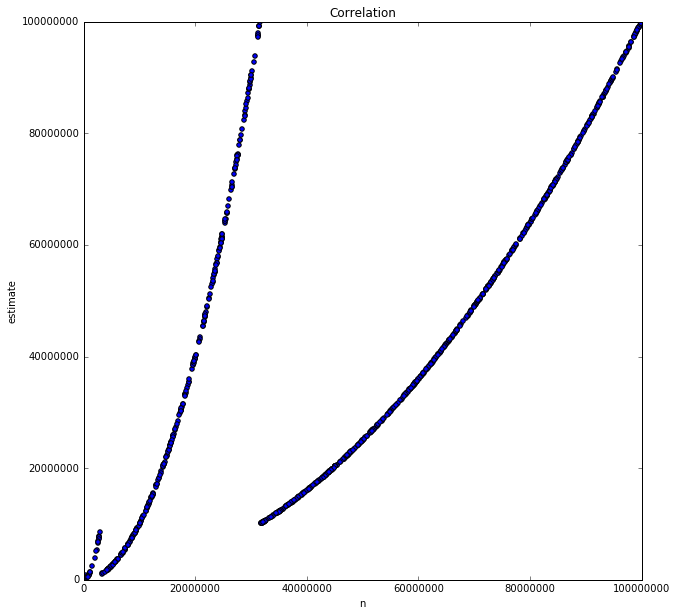

In [12]:
fig, axes = plt.subplots()

axes.get_xaxis().get_major_formatter().set_scientific(False)
axes.get_yaxis().get_major_formatter().set_scientific(False)

data.plot(kind='scatter', ax = axes, x= 'n', y= 'estimate', title='Correlation', 
          figsize=(10,10), xlim=(0,100000000), ylim=(0,100000000))


## Error

Looking at the errors as a percentage of the square roots themselves:

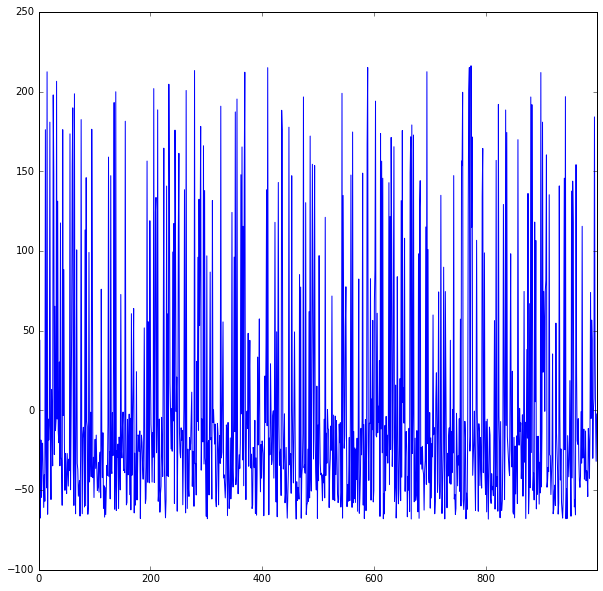

In [13]:
errors = 100 * (data.estimate - data.n) / data.n

fig, axes = plt.subplots()

axes.get_xaxis().get_major_formatter().set_scientific(False)
axes.get_yaxis().get_major_formatter().set_scientific(False)

errors.plot(ax= axes, figsize=(10,10))


## Conclusions

For such a simple estimate it's pretty good, varying between about half and double the true value.